In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import plotly.tools as tls
import plotly.plotly as py
import cufflinks as cf
# print(cf.__version__)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

# ------------------------------------------------------------------------
tls.set_credentials_file(username='VIvidh',api_key='5RTkH4bVaeoz7EkYo2ce')
# -------------------------------------------------------------------------

In [2]:
BlackFridayTrain = pd.read_csv('train.csv')

In [3]:
BlackFridayTrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
BlackFridayTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
BlackFridayTrain.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
BlackFridayTrain.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
BlackFridayTrain.groupby(['Gender'])['Purchase'].sum().iplot(kind='bar', yTitle='Total Purchase Amount', title='Total Purchase by Gender')

In [8]:
BlackFridayTrain.groupby(['Age'])['Purchase'].sum().iplot(kind='bar', title="Age Distribution of the data")

In [9]:
BlackFridayTrain.groupby(['Occupation'])['Purchase'].sum().iplot(kind='bar', title="Occupation Distribution of the data")

In [10]:
BlackFridayTrain.groupby('City_Category')['Purchase'].sum().iplot(kind='bar', title="City Category Distribution of the data")

In [11]:
BlackFridayTrain.groupby('Stay_In_Current_City_Years')['Purchase'].sum().iplot(kind='bar', title="Stay Duration Distribution of the data")

In [12]:
BlackFridayTrain.groupby('Marital_Status')['Purchase'].sum().iplot(kind='bar', title="Marital Status Distribution of the data")

In [13]:
BlackFridayTrainNew = BlackFridayTrain.copy(deep=True)

BlackFridayTrainNew.loc[BlackFridayTrainNew['Gender'] == 'F', 'Gender'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['Gender'] == 'M', 'Gender'] = 1

BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '0-17', 'Age'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '18-25', 'Age'] = 1
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '26-35', 'Age'] = 2
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '36-45', 'Age'] = 3
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '46-50', 'Age'] = 4
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '51-55', 'Age'] = 5
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '55+', 'Age'] = 6

BlackFridayTrainNew.loc[BlackFridayTrainNew['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'A', 'City_Category'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'B', 'City_Category'] = 1
BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'C', 'City_Category'] = 2

BlackFridayTrainNew['Product_Category_2'].fillna(0, inplace=True)
BlackFridayTrainNew['Product_Category_3'].fillna(0, inplace=True)
BlackFridayTrainNew['Product_Category_2'] = BlackFridayTrainNew['Product_Category_2'].astype(int)
BlackFridayTrainNew['Product_Category_3'] = BlackFridayTrainNew['Product_Category_3'].astype(int)

In [14]:
BlackFridayTrainNew.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [15]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969


In [16]:
ageVsGender = BlackFridayTrainNew.groupby(['Age', 'Gender'])['Purchase'].sum().unstack()

In [17]:
ageVsGender

Gender,0,1
Age,,
0,42385978,92527205
1,205475842,708372833
2,442976233,1588794345
3,243438963,783130921
4,116706864,304136539
5,89465997,277633647
6,45782765,154984610


In [18]:
ageVsGender.iplot(kind='bar', title="Gender Distribution across various Age Groups")

In [19]:
conditions = [
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] == 0) & (BlackFridayTrainNew['Product_Category_3'] == 0),
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] != 0) & (BlackFridayTrainNew['Product_Category_3'] == 0),
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] != 0) & (BlackFridayTrainNew['Product_Category_3'] != 0)]
choices = [1, 2, 3]
BlackFridayTrainNew['Category_Count'] = np.select(conditions, choices, default=0)

In [20]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,1
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,3
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,1
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,2
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,1


In [21]:
BlackFridayTrainNew.corr()

,User_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count
User_ID,1.000000,-0.033474,0.032698,-0.023971,0.022859,0.020443,0.003825,0.003896,0.003605,0.004716,0.004270
Gender,-0.033474,1.000000,-0.004262,0.117291,-0.004515,-0.011603,-0.045594,-0.000954,0.036146,0.060346,0.026808
Age,0.032698,-0.004262,1.000000,0.091463,0.123079,0.311738,0.061197,0.018770,-0.007422,0.015839,-0.021246
Occupation,-0.023971,0.117291,0.091463,1.000000,0.034479,0.024280,-0.007618,0.006712,0.012269,0.020833,0.011600
City_Category,0.022859,-0.004515,0.123079,0.034479,1.000000,0.039790,-0.014364,0.016003,0.035525,0.061914,0.040739
Marital_Status,0.020443,-0.011603,0.311738,0.024280,0.039790,1.000000,0.019888,0.001099,-0.004629,-0.000463,-0.011257
Product_Category_1,0.003825,-0.045594,0.061197,-0.007618,-0.014364,0.019888,1.000000,-0.067877,-0.385534,-0.343703,-0.518270
Product_Category_2,0.003896,-0.000954,0.018770,0.006712,0.016003,0.001099,-0.067877,1.000000,0.094750,0.052288,0.444873
Product_Category_3,0.003605,0.036146,-0.007422,0.012269,0.035525,-0.004629,-0.385534,0.094750,1.000000,0.288501,0.791044
Purchase,0.004716,0.060346,0.015839,0.020833,0.061914,-0.000463,-0.343703,0.052288,0.288501,1.000000,0.323187


In [22]:
X = BlackFridayTrainNew.drop(['Purchase','Product_ID'], axis=1)
y = BlackFridayTrainNew['Purchase']

In [23]:
X.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count
0,1000001,0,0,10,0,2,0,3,0,0,1
1,1000001,0,0,10,0,2,0,1,6,14,3
2,1000001,0,0,10,0,2,0,12,0,0,1
3,1000001,0,0,10,0,2,0,12,14,0,2
4,1000002,1,6,16,2,4,0,8,0,0,1


In [24]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(440054, 11) (440054,)
(110014, 11) (110014,)


In [27]:
lm = linear_model.LinearRegression()

In [28]:
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [29]:
print(predictions.shape)
print(y_test.shape)

(110014,)
(110014,)


In [30]:
predictions[0:5]

array([ 8583.12654626, 10508.18046316, 12205.12403259,  5350.70590476,
        4775.91038689])

In [31]:
mse = np.mean((predictions - y_test)**2)
print(mse)

21277554.227087


In [32]:
rmse = sqrt(mse)
print(rmse)

4612.759935991358


In [33]:
lm.score(X_test,y_test)

0.15610607018840272

Text(0.5, 1.0, 'Residual plot')

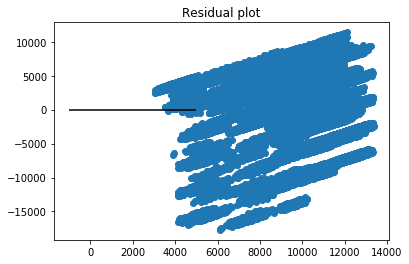

In [34]:
x_plot = plt.scatter(predictions, (predictions - y_test))
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

In [35]:
predictors = X_train.columns
coef = Series(lm.coef_,predictors).sort_values()
coef.iplot(kind='bar', title='Modal Coefficients')

In [36]:
from sklearn.linear_model import Ridge

## training the model
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)
predictions = ridgeReg.predict(X_test)

#calculating mse
mse = np.mean((predictions - y_test)**2)
print("mean square error : ", mse)

#calculating rmse
rmse = sqrt(mse)
print("root mean square error : ", rmse)

#Score
print("Score : ", ridgeReg.score(X_test,y_test))

mean square error :  21281700.935362194
root mean square error :  4613.209396435652
Score :  0.15594160664599155


In [37]:
from sklearn.linear_model import Lasso

## training the model
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X_train,y_train)
predictions = lassoReg.predict(X_test)

# calculating mse
mse = np.mean((predictions - y_test)**2)
print("mean square error : ", mse)

#calculating rmse
rmse = sqrt(mse)
print("root mean square error : ", rmse)

#Score
print("Score : ", lassoReg.score(X_test,y_test))

mean square error :  21447951.59996022
root mean square error :  4631.193323535546
Score :  0.14934790112963903


In [38]:
from sklearn.linear_model import ElasticNet

## training the model
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(X_train,y_train)
predictions = ENreg.predict(X_test)

#calculating mse
mse = np.mean((predictions - y_test)**2)
print("mean square error : ", mse)

#calculating rmse
rmse = sqrt(mse)
print("root mean square error : ", rmse)

#Score
print("Score : ", ENreg.score(X_test, y_test))

mean square error :  21394274.26641919
root mean square error :  4625.3944984638
Score :  0.15147681009447267


In [39]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor()

# Train the model on training data
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [40]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2182.42 degrees.


In [41]:
# Saving feature names for later use
feature_list = list(X.columns)
# Convert to numpy array
features = np.array(X)

In [42]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(features, round(importance, 2)) for features, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Product_Category_1   Importance: 0.71
Variable: User_ID              Importance: 0.12
Variable: Occupation           Importance: 0.04
Variable: Stay_In_Current_City_Years Importance: 0.03
Variable: Product_Category_2   Importance: 0.03
Variable: Age                  Importance: 0.02
Variable: Product_Category_3   Importance: 0.02
Variable: Gender               Importance: 0.01
Variable: City_Category        Importance: 0.01
Variable: Marital_Status       Importance: 0.01
Variable: Category_Count       Importance: 0.0


### Testing on Model on Actual Data

In [43]:
BlackFridayTest = pd.read_csv('test.csv')

In [44]:
BlackFridayTest.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [45]:
BlackFridayTestNew = BlackFridayTest.copy(deep=True)

BlackFridayTestNew.loc[BlackFridayTestNew['Gender'] == 'F', 'Gender'] = 0
BlackFridayTestNew.loc[BlackFridayTestNew['Gender'] == 'M', 'Gender'] = 1

BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '0-17', 'Age'] = 0
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '18-25', 'Age'] = 1
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '26-35', 'Age'] = 2
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '36-45', 'Age'] = 3
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '46-50', 'Age'] = 4
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '51-55', 'Age'] = 5
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '55+', 'Age'] = 6

BlackFridayTestNew.loc[BlackFridayTestNew['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

BlackFridayTestNew.loc[BlackFridayTestNew['City_Category'] == 'A', 'City_Category'] = 0
BlackFridayTestNew.loc[BlackFridayTestNew['City_Category'] == 'B', 'City_Category'] = 1
BlackFridayTestNew.loc[BlackFridayTestNew['City_Category'] == 'C', 'City_Category'] = 2

BlackFridayTestNew['Product_Category_2'].fillna(0, inplace=True)
BlackFridayTestNew['Product_Category_3'].fillna(0, inplace=True)
BlackFridayTestNew['Product_Category_2'] = BlackFridayTestNew['Product_Category_2'].astype(int)
BlackFridayTestNew['Product_Category_3'] = BlackFridayTestNew['Product_Category_3'].astype(int)

conditions = [
    (BlackFridayTestNew['Product_Category_1'] != 0) & (BlackFridayTestNew['Product_Category_2'] == 0) & (BlackFridayTestNew['Product_Category_3'] == 0),
    (BlackFridayTestNew['Product_Category_1'] != 0) & (BlackFridayTestNew['Product_Category_2'] != 0) & (BlackFridayTestNew['Product_Category_3'] == 0),
    (BlackFridayTestNew['Product_Category_1'] != 0) & (BlackFridayTestNew['Product_Category_2'] != 0) & (BlackFridayTestNew['Product_Category_3'] != 0)]
choices = [1, 2, 3]
BlackFridayTestNew['Category_Count'] = np.select(conditions, choices, default=0)

In [46]:
BlackFridayTestNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count
0,1000004,P00128942,1,4,7,1,2,1,1,11,0,2
1,1000009,P00113442,1,2,17,2,0,0,3,5,0,2
2,1000010,P00288442,0,3,1,1,4,1,5,14,0,2
3,1000010,P00145342,0,3,1,1,4,1,4,9,0,2
4,1000011,P00053842,0,2,1,2,1,0,4,5,12,3


## Linear Regression

In [58]:
from sklearn import linear_model

In [59]:
regr = linear_model.LinearRegression(normalize=True)

In [60]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [62]:
BlackFridayTest = pd.read_csv('test.csv')

In [63]:
x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [64]:
y_pred = regr.predict(x_test)

In [65]:
print(y_pred)

[10427.16059146 10215.01589449  8505.45722873 ... 11791.19263526
  7485.22329509  9313.69420327]


In [66]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [67]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 1.32211140e-02  4.92185248e+02  1.11595975e+02  5.72600756e+00
  3.06388978e+02  9.20103366e+00 -4.66260526e+01 -2.98498687e+02
 -3.60175804e+01  5.58934544e+01  1.04862242e+03]


In [68]:
finalsolution.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,10427.160591
1,1000009,P00113442,10215.015894
2,1000010,P00288442,8505.457229
3,1000010,P00145342,8984.043817
4,1000011,P00053842,11061.287187


In [69]:
finalsolution.count()

User_ID       233599
Product_ID    233599
Purchase      233599
dtype: int64

In [70]:
finalsolution.to_csv('finalsolution_LinearRegression.csv')

### Result - RMSE 4620.something currently
### Best Solution on Leaderboards - RMSE 2405.something

## Random Forest

In [79]:
X_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [80]:
y_pred = rf.predict(X_test)

In [81]:
print(y_pred)

[15237.45        7016.5         8246.90259019 ... 12430.2
 22717.          1998.49809524]


In [82]:
BlackFridayTestNew['User_ID'].shape

(233599,)

In [83]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [84]:
finalsolution.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,15237.45000
1,1000009,P00113442,7016.50000
2,1000010,P00288442,8246.90259
3,1000010,P00145342,2599.20000
4,1000011,P00053842,2869.70000


In [85]:
finalsolution.count()

User_ID       233599
Product_ID    233599
Purchase      233599
dtype: int64

In [86]:
finalsolution.to_csv('finalsolution_RandomForest.csv')

### Result - RMSE 3047.something currently (Random Forest)
### Best Solution on Leaderboards - RMSE 2405.something